<a href="https://colab.research.google.com/github/dmtzt/machine-learning-specialization/blob/main/2_practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification: Handwritten Recognition

## 1- Packages

In [77]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2- Dataset

In [137]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [138]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [139]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


5


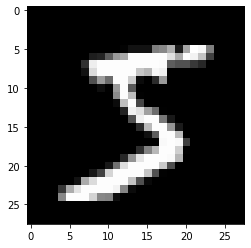

In [140]:
print(y_train[0])

img_arr = np.array(X_train[0], dtype='float')
img = img_arr.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.show()

7


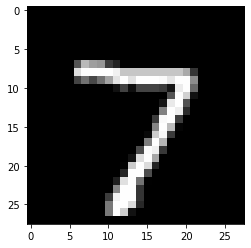

In [141]:
print(y_test[0])

img_arr = np.array(X_test[0], dtype='float')
img = img_arr.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.show()

## 3- Preprocessing

In [142]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## 4- Model

In [58]:
model = tf.keras.models.Sequential(
    [               
        tf.keras.layers.Flatten(input_shape=[28,28]),
        tf.keras.layers.Dense(300, activation="relu", name="L1"),
        tf.keras.layers.Dense(300, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
    ], name = "my_model" 
)

In [59]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 300)               235500    
                                                                 
 L2 (Dense)                  (None, 300)               90300     
                                                                 
 L3 (Dense)                  (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

## 5- Training

In [62]:
history = model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0758 - accuracy: 0.9763
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0546 - accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0402 - accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0325 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0260 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0264 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0201 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

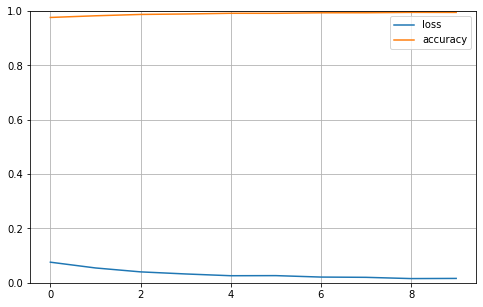

In [78]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 7- Evaluation

In [79]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1212 - accuracy: 0.9780


[0.12118231505155563, 0.9779999852180481]

## 6- Prediction

In [150]:
X_new = X_test[1015].reshape(-1, 28*28)
X_new.shape

(1, 784)

In [151]:
prediction = model.predict(X_new)

1/1 [==============================] - 0s 23ms/step


In [152]:
prediction.round(2)

array([[-24.4 ,  -0.08,  -9.96, -18.65,  16.48,  -9.23, -20.59,  -7.22,
        -11.81,  -0.12]], dtype=float32)

In [153]:
prediction_p = tf.nn.softmax(prediction)
prediction_p

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.7620012e-18, 6.4493221e-08, 3.2879461e-12, 5.5656454e-16,
        9.9999976e-01, 6.8334687e-12, 7.9885808e-17, 5.1143940e-11,
        5.1702170e-13, 6.2093548e-08]], dtype=float32)>

In [154]:
y_pred = np.argmax(prediction_p)

4
4


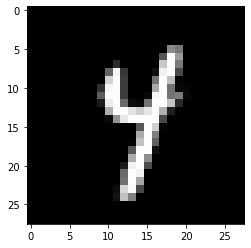

In [155]:
print(y_pred)
print(y_test[1015])

img_arr = np.array(X_test[1015] * 255.0, dtype='float')
img = img_arr.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.show()